## RETAIL CASE STUDY

### Import the pakages

In [270]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Import the datasets

In [271]:
customer = pd.read_csv("E:\PYTHON_ANALYTICSLAB\Case Study 1 - Retail Case Study\Customer.csv")
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [272]:
prod_cat_info = pd.read_csv("E:\PYTHON_ANALYTICSLAB\Case Study 1 - Retail Case Study\prod_cat_info.csv")
prod_cat_info.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [273]:
transactions = pd.read_csv("E:\PYTHON_ANALYTICSLAB\Case Study 1 - Retail Case Study\Transactions.csv")
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


## Business Problem:

### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [274]:
cust_trans = pd.merge(left = customer, right = transactions, how = 'left', left_on = 'customer_Id', right_on = 'cust_id' )
cust_trans.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,1.619787e+10,268408.0,16-12-2013,1.0,4.0,-5.0,-210.0,110.250,-1160.250,Flagship store
2,268408,02-01-1970,M,4.0,1.619787e+10,268408.0,12/12/2013,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store
3,268408,02-01-1970,M,4.0,2.881014e+10,268408.0,2/9/2013,10.0,6.0,2.0,813.0,170.730,1796.730,TeleShop
4,268408,02-01-1970,M,4.0,6.463344e+10,268408.0,6/5/2013,4.0,2.0,3.0,312.0,98.280,1034.280,Flagship store


In [275]:
Customer_final = pd.merge( left= cust_trans, right= prod_cat_info, how= 'left', 
                left_on= ['prod_cat_code','prod_subcat_code'], right_on= ['prod_cat_code','prod_sub_cat_code'] )
Customer_final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,7.0,Fiction
1,268408,02-01-1970,M,4.0,1.619787e+10,268408.0,16-12-2013,1.0,4.0,-5.0,-210.0,110.250,-1160.250,Flagship store,Bags,1.0,Mens
2,268408,02-01-1970,M,4.0,1.619787e+10,268408.0,12/12/2013,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store,Bags,1.0,Mens
3,268408,02-01-1970,M,4.0,2.881014e+10,268408.0,2/9/2013,10.0,6.0,2.0,813.0,170.730,1796.730,TeleShop,Home and kitchen,10.0,Kitchen
4,268408,02-01-1970,M,4.0,6.463344e+10,268408.0,6/5/2013,4.0,2.0,3.0,312.0,98.280,1034.280,Flagship store,Footwear,4.0,Kids


In [276]:
Customer_final = Customer_final.loc[ : : , ('customer_Id', 'DOB', 'Gender','city_code','transaction_id', 'tran_date', 
            'prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate' ,'Tax', 'total_amt', 'Store_type', 'prod_cat', 'prod_subcat')]
Customer_final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,8.724384e+10,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction
1,268408,02-01-1970,M,4.0,1.619787e+10,16-12-2013,1.0,4.0,-5.0,-210.0,110.250,-1160.250,Flagship store,Bags,Mens
2,268408,02-01-1970,M,4.0,1.619787e+10,12/12/2013,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store,Bags,Mens
3,268408,02-01-1970,M,4.0,2.881014e+10,2/9/2013,10.0,6.0,2.0,813.0,170.730,1796.730,TeleShop,Home and kitchen,Kitchen
4,268408,02-01-1970,M,4.0,6.463344e+10,6/5/2013,4.0,2.0,3.0,312.0,98.280,1034.280,Flagship store,Footwear,Kids


### 2. Prepare a summary report for the merged data set.

### a. Get the column names and their corresponding data types

In [277]:
Customer_final.dtypes

customer_Id           int64
DOB                  object
Gender               object
city_code           float64
transaction_id      float64
tran_date            object
prod_subcat_code    float64
prod_cat_code       float64
Qty                 float64
Rate                float64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
dtype: object

### b. Top/Bottom 10 observations

In [278]:
# top 10 observation

Customer_final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,8.724384e+10,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction
1,268408,02-01-1970,M,4.0,1.619787e+10,16-12-2013,1.0,4.0,-5.0,-210.0,110.250,-1160.250,Flagship store,Bags,Mens
2,268408,02-01-1970,M,4.0,1.619787e+10,12/12/2013,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store,Bags,Mens
3,268408,02-01-1970,M,4.0,2.881014e+10,2/9/2013,10.0,6.0,2.0,813.0,170.730,1796.730,TeleShop,Home and kitchen,Kitchen
4,268408,02-01-1970,M,4.0,6.463344e+10,6/5/2013,4.0,2.0,3.0,312.0,98.280,1034.280,Flagship store,Footwear,Kids
5,268408,02-01-1970,M,4.0,5.690286e+10,30-01-2013,9.0,3.0,5.0,868.0,455.700,4795.700,e-Shop,Electronics,Cameras
6,268408,02-01-1970,M,4.0,5.684453e+10,14-10-2012,1.0,2.0,5.0,1175.0,616.875,6491.875,MBR,Footwear,Mens
7,268408,02-01-1970,M,4.0,1.951606e+10,7/9/2012,10.0,3.0,4.0,650.0,273.000,2873.000,e-Shop,Electronics,Audio and video
8,268408,02-01-1970,M,4.0,1.264450e+10,14-08-2012,4.0,4.0,3.0,321.0,101.115,1064.115,TeleShop,Bags,Women
9,268408,02-01-1970,M,4.0,6.331455e+10,26-04-2012,1.0,1.0,1.0,806.0,84.630,890.630,Flagship store,Clothing,Women


In [279]:
# bottom 10 observation

Customer_final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
23184,270476,25-12-1992,F,3.0,7.803441e+10,13-08-2013,11.0,6.0,1.0,971.0,101.955,1072.955,TeleShop,Home and kitchen,Bath
23185,270476,25-12-1992,F,3.0,3.359888e+09,16-03-2013,10.0,3.0,4.0,361.0,151.620,1595.620,MBR,Electronics,Audio and video
23186,270476,25-12-1992,F,3.0,2.288339e+10,22-05-2012,4.0,2.0,4.0,898.0,377.160,3969.160,Flagship store,Footwear,Kids
23187,270476,25-12-1992,F,3.0,1.972519e+10,21-02-2012,4.0,4.0,4.0,618.0,259.560,2731.560,e-Shop,Bags,Women
23188,270476,25-12-1992,F,3.0,8.547516e+10,9/8/2011,5.0,3.0,5.0,1354.0,710.850,7480.850,Flagship store,Electronics,Computers
23189,269626,27-12-1992,F,5.0,7.136903e+10,18-10-2011,12.0,6.0,1.0,638.0,66.990,704.990,e-Shop,Home and kitchen,Tools
23190,269626,27-12-1992,F,5.0,9.413405e+10,7/7/2011,3.0,1.0,3.0,1078.0,339.570,3573.570,MBR,Clothing,Kids
23191,274308,29-12-1992,F,5.0,2.620869e+10,22-10-2012,1.0,2.0,2.0,898.0,188.580,1984.580,MBR,Footwear,Mens
23192,274308,29-12-1992,F,5.0,5.735882e+10,5/9/2012,1.0,2.0,4.0,876.0,367.920,3871.920,e-Shop,Footwear,Mens
23193,274308,29-12-1992,F,5.0,5.816054e+10,4/7/2012,12.0,5.0,5.0,588.0,308.700,3248.700,e-Shop,Books,Academic


### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [316]:
Five_number_summary = Customer_final.describe().loc[ : : , ('Qty','Rate','Tax','total_amt')].T

In [317]:
Five_number_summary = Five_number_summary.loc[ : : , ('min', '25%', '50%', '75%', 'max')]
Five_number_summary.columns = ['min','Q1','median','Q3','max']

In [318]:
Five_number_summary

,min,Q1,median,Q3,max
Qty,-5.000,1.00,3.00,4.000,5.0
Rate,-1499.000,312.00,710.00,1109.000,1500.0
Tax,7.350,98.28,199.08,365.715,787.5
total_amt,-8270.925,762.45,1754.74,3569.150,8287.5


### d. Frequency tables for all the categorical variables

In [319]:
categorical_vars = ['Gender', 'city_code', 'Store_type', 'prod_cat', 'prod_subcat','prod_cat_code','prod_subcat_code']

# Creating an empty dictionary to store the frequency tables
frequency_tables = {}

# Creating frequency tables for each categorical variable
for var in categorical_vars:
    frequency_table = Customer_final[var].value_counts().reset_index()
    frequency_table.columns = [var, 'Frequency']
    frequency_tables[var] = frequency_table

# Displaying the frequency tables
for var, freq_table in frequency_tables.items():
    print(f"{var} Frequency Table:")
    print(freq_table)
    print()

Gender Frequency Table:
  Gender  Frequency
0      M      11877
1      F      11308

city_code Frequency Table:
   city_code  Frequency
0        4.0       2435
1        3.0       2430
2        5.0       2376
3        7.0       2368
4       10.0       2345
5        8.0       2341
6        2.0       2288
7        1.0       2274
8        9.0       2192
9        6.0       2137

Store_type Frequency Table:
       Store_type  Frequency
0          e-Shop       9311
1             MBR       4661
2  Flagship store       4577
3        TeleShop       4504

prod_cat Frequency Table:
           prod_cat  Frequency
0             Books       6069
1       Electronics       4898
2  Home and kitchen       4129
3          Footwear       2999
4          Clothing       2960
5              Bags       1998

prod_subcat Frequency Table:
            prod_subcat  Frequency
0                 Women       3048
1                  Mens       2912
2                  Kids       1997
3                 Tools       1062
4

### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

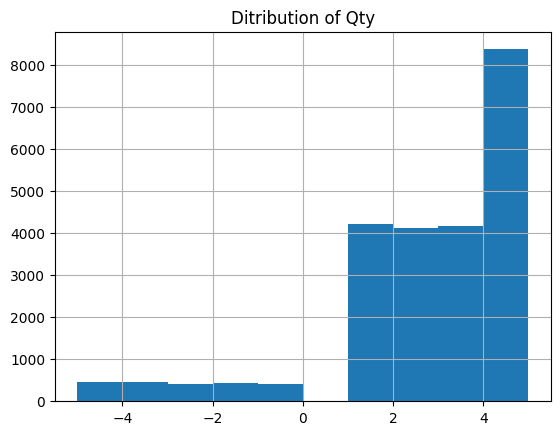

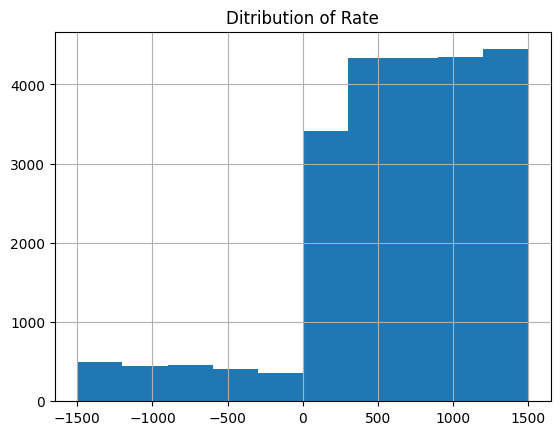

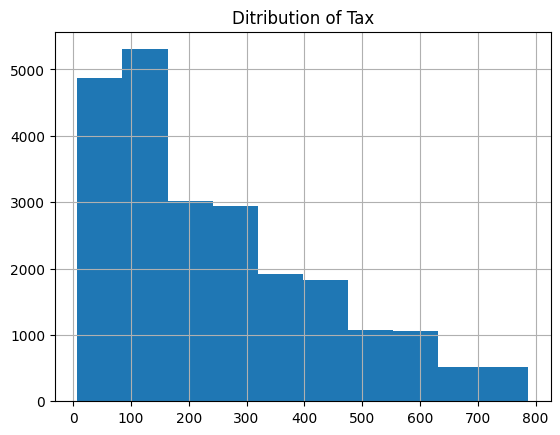

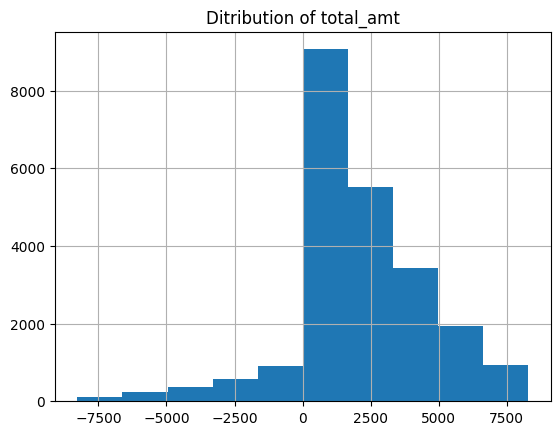

Qty          None
Rate         None
Tax          None
total_amt    None
dtype: object

In [328]:
# histogram on continuous variables:

def hist_plot (x):
    
    x.hist()
    plt.title('Ditribution of '+ x.name)
    plt.show()
    
Customer_final.loc[ : : , ['Qty','Rate','Tax','total_amt']].apply(hist_plot)

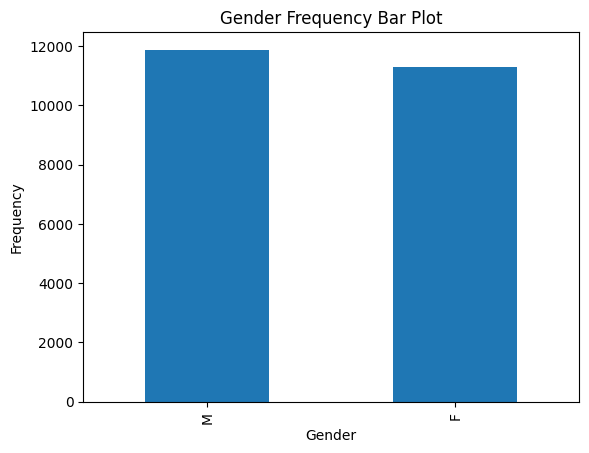

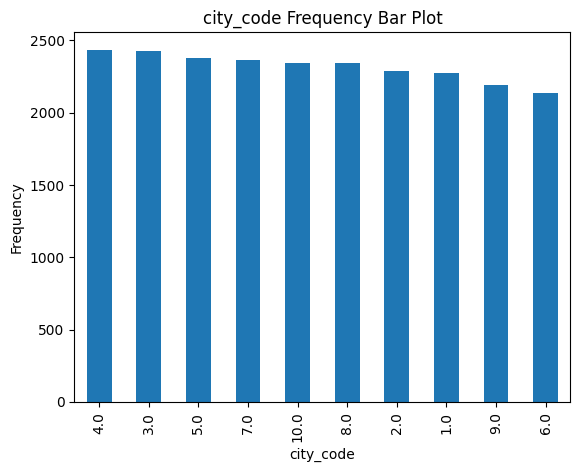

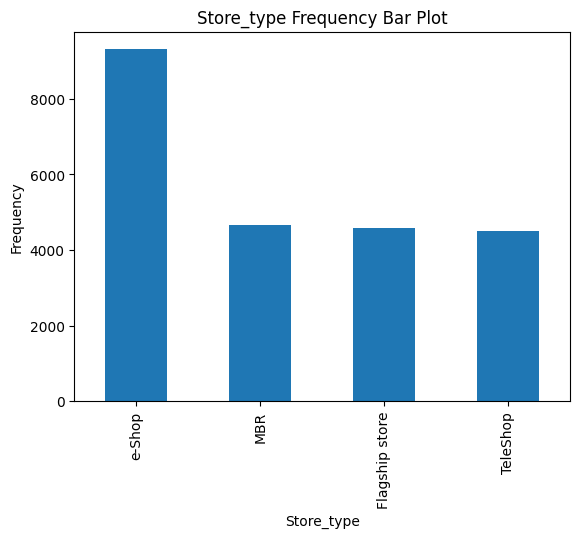

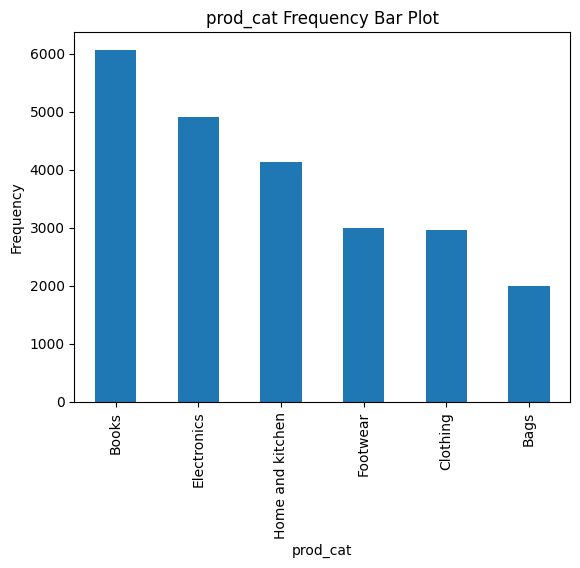

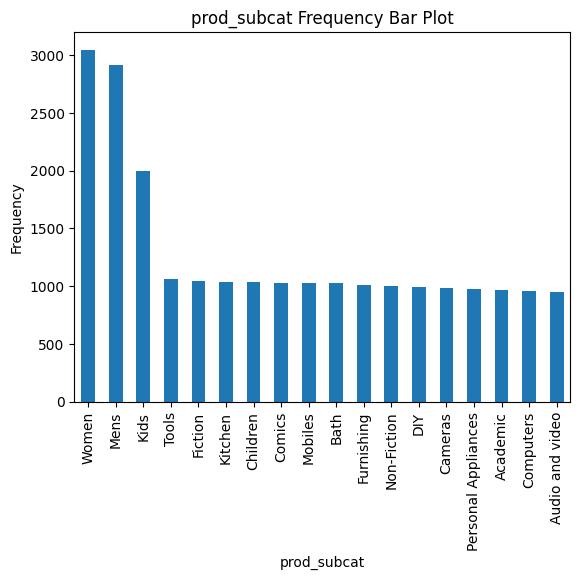

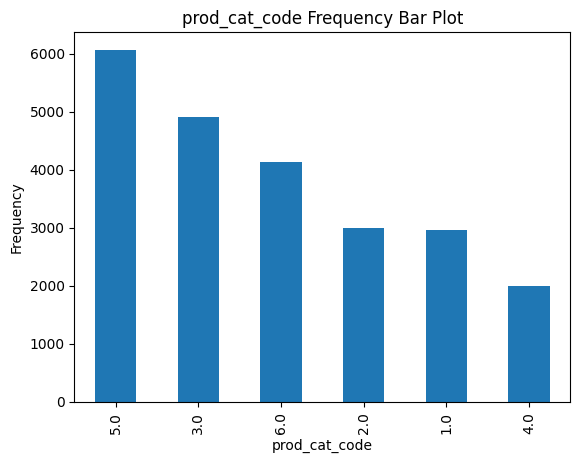

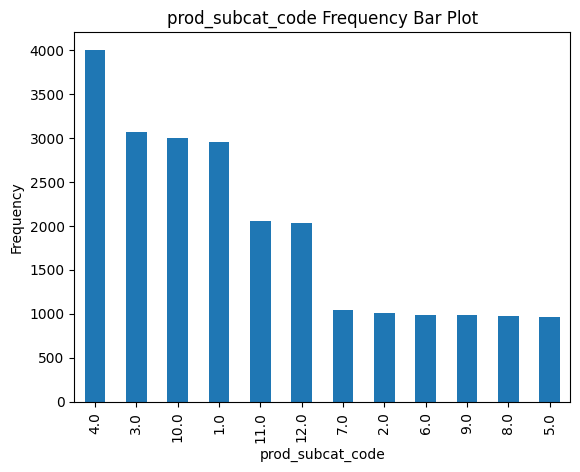

In [325]:
# frequency bar on categorical varible:

# Selecting the categorical variables
categorical_vars = ['Gender', 'city_code', 'Store_type', 'prod_cat', 'prod_subcat','prod_cat_code','prod_subcat_code']

# Creating frequency bar plots for each categorical variable
for var in categorical_vars:
    frequency_table = Customer_final[var].value_counts()
    frequency_table.plot(kind='bar')
    plt.title(f"{var} Frequency Bar Plot")
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

### 4. Calculate the following information using the merged dataset :

### a. Time period of the available transaction data

In [330]:
# Convert the 'tran_date' column to datetime format
Customer_final['tran_date'] = pd.to_datetime(Customer_final['tran_date'])

# Calculate the minimum and maximum dates
min_date = Customer_final['tran_date'].min()
max_date = Customer_final['tran_date'].max()

# Calculate the time period
time_period = max_date - min_date

# Display the time period
print("Minimum Date:", min_date)
print("Maximum Date:", max_date)
print("Time Period:", time_period)

Minimum Date: 2011-01-02 00:00:00
Maximum Date: 2014-12-02 00:00:00
Time Period: 1430 days 00:00:00


### b. Count of transactions where the total amount of transaction was negative

In [288]:
Negative_transcations = Customer_final.loc[Customer_final.total_amt < 0, 'total_amt'].count()
print('count of -ve transactions : ', Negative_transcations)

count of -ve transactions :  2177


### 5. Analyze which product categories are more popular among females vs male customers.

In [331]:
q5_summ = pd.crosstab(index= Customer_final.prod_cat , columns= Customer_final.Gender)
q5_summ

Gender,F,M
prod_cat,,
Bags,994,1004
Books,2949,3116
Clothing,1439,1518
Electronics,2328,2570
Footwear,1529,1469
Home and kitchen,1994,2134


In [334]:
q5_summ.sort_values(['F','M'], ascending= False).head(1)

Gender,F,M
prod_cat,,
Books,2949,3116


### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [290]:
City_Customer = pd.DataFrame(Customer_final.groupby('city_code').customer_Id.count()).sort_values('customer_Id', ascending= False)
City_Customer.columns = [ 'No_of_customers']
City_Customer

,No_of_customers
city_code,
4.0,2435
3.0,2430
5.0,2376
7.0,2368
10.0,2345
8.0,2341
2.0,2288
1.0,2274
9.0,2192


In [291]:
City_Customer['% age of customers'] = (City_Customer.No_of_customers / City_Customer.No_of_customers.sum())*100
City_Customer.head(1)

,No_of_customers,% age of customers
city_code,,
4.0,2435,10.502027


### 7. Which store type sells the maximum products by value and by quantity?

In [292]:
Store_type_value_quantity= Customer_final.groupby('Store_type')[['total_amt', 'Qty']].sum()
Store_type_value_quantity

,total_amt,Qty
Store_type,,
Flagship store,9.715688e+06,11133.0
MBR,9.674486e+06,11194.0
TeleShop,9.364781e+06,10984.0
e-Shop,1.982482e+07,22763.0


In [293]:
Store_type_value_quantity.sort_values(['total_amt','Qty'], ascending= False).head(1)

,total_amt,Qty
Store_type,,
e-Shop,19824816.05,22763.0


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [294]:
summ1 = pd.crosstab(index= Customer_final.prod_cat, columns= Customer_final.Store_type, 
                    values= Customer_final.total_amt, aggfunc= sum)
summ1

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.835,848678.675,789181.055,1616300.075
Books,2488205.850,2496039.195,2545005.060,5293443.935
Clothing,1194423.230,1287686.335,1241834.360,2527193.565
Electronics,2215136.040,2107514.565,1973338.835,4426474.195
Footwear,1234806.560,1112163.715,1235719.290,2637084.710
Home and kitchen,1712567.675,1822403.570,1579702.475,3324319.570


In [337]:
total_amount_earned = summ1.loc[ ['Clothing','Electronics'] , 'Flagship store'].sum()
print('Total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores :', total_amount_earned)

Total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores : 3409559.27


### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [338]:
total_amount = Customer_final[(Customer_final.Gender == 'M') & (Customer_final.prod_cat == 'Electronics')].total_amt.sum()

print('Total amount earned from "Male" customers under the "Electronics" category :', total_amount)

Total amount earned from "Male" customers under the "Electronics" category : 5703109.425


### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [297]:
#removing all transactions which have any negative amounts

new_data = Customer_final[Customer_final.total_amt > 0 ]
new_data.head(3)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,8.724384e+10,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction
2,268408,02-01-1970,M,4.0,1.619787e+10,2013-12-12,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store,Bags,Mens
3,268408,02-01-1970,M,4.0,2.881014e+10,2013-02-09,10.0,6.0,2.0,813.0,170.730,1796.730,TeleShop,Home and kitchen,Kitchen


In [298]:
# number of unique transactions per customer

unique_transactions = new_data.groupby('customer_Id').transaction_id.nunique()
unique_transactions

customer_Id
266783     4
266784     3
266785     7
266788     4
266794    11
          ..
275257     4
275261     3
275262     2
275264     2
275265     3
Name: transaction_id, Length: 5506, dtype: int64

In [299]:
# number of customers with more than 10 unique transactions

final_summary = unique_transactions[unique_transactions > 10 ].count()
print('Number of customers having more than 10 unique transactions :', final_summary)

Number of customers having more than 10 unique transactions : 6


### 11. For all customers aged between 25 - 35, find out:

In [300]:
# calculate age on basis of DOB

Customer_final['Age'] = (dt.datetime.now()- pd.to_datetime(Customer_final.DOB, format= '%d-%m-%Y')).astype('<m8[Y]')
Customer_final.head(3)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Age
0,268408,02-01-1970,M,4.0,8.724384e+10,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction,53.0
1,268408,02-01-1970,M,4.0,1.619787e+10,2013-12-16,1.0,4.0,-5.0,-210.0,110.250,-1160.250,Flagship store,Bags,Mens,53.0
2,268408,02-01-1970,M,4.0,1.619787e+10,2013-12-12,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store,Bags,Mens,53.0


In [301]:
# filter data of customers having age in between 25-35

q11_summ = Customer_final[(Customer_final.Age >= 25) & (Customer_final.Age <= 35)]
q11_summ.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Age
17366,273095,27-05-1987,M,9.0,2.792654e+10,2014-01-23,11.0,5.0,4.0,170.0,71.400,751.400,MBR,Books,Children,35.0
17367,273095,27-05-1987,M,9.0,1.079066e+10,2013-05-14,11.0,6.0,4.0,648.0,272.160,2864.160,TeleShop,Home and kitchen,Bath,35.0
17368,273095,27-05-1987,M,9.0,1.161323e+10,2013-04-15,12.0,6.0,1.0,761.0,79.905,840.905,TeleShop,Home and kitchen,Tools,35.0
17369,273095,27-05-1987,M,9.0,2.369176e+10,2012-04-16,6.0,5.0,1.0,1230.0,129.150,1359.150,Flagship store,Books,DIY,35.0
17370,273095,27-05-1987,M,9.0,7.242258e+10,2012-05-03,1.0,2.0,5.0,1373.0,720.825,7585.825,e-Shop,Footwear,Mens,35.0


### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [302]:
final_result =  q11_summ.loc[q11_summ.prod_cat.isin(['Electronics','Books']), 'total_amt'].sum()
print('Total amount spent for “Electronics” and “Books” product categories :', final_result)

Total amount spent for “Electronics” and “Books” product categories : 5695204.255


### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [303]:
final_reslt = q11_summ.loc[(q11_summ.tran_date >= '2014-01-01') & (q11_summ.tran_date <= '2014-03-01'), 'total_amt'].sum()
print('Total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 :', final_reslt)

Total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 : 416877.82499999995
